<a href="https://colab.research.google.com/github/amina04/CNN-lstm/blob/main/CNN_LSTM_par_nsl_kdd_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **chargement des fichiers qui sont sur drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


la bibliothéque pandas nous donne le droit de travailler avec la format csv.
On utilise panda pour ouvrir la dataset

In [2]:
import pandas as pd  

In [3]:
import tensorflow as tf

**Donner les noms des column au dataset et spécifier la liste des  string contenu **

In [4]:

featureV=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

flagV=['OTH','RSTOS0','SF','SH','RSTO','S2','S1','REJ','S3','RSTR','S0']

protocol_typeV=['tcp','udp','icmp']

serviceV=['http','smtp','finger','domain_u','auth','telnet','ftp','eco_i','ntp_u','ecr_i','other','private','pop_3','ftp_data',
                  'rje','time','mtp','link','remote_job','gopher','ssh','name','whois','domain','login','imap4','daytime','ctf','nntp',
                  'shell','IRC','nnsp','http_443','exec','printer','efs','courier','uucp','klogin','kshell','echo','discard','systat',
                  'supdup','iso_tsap','hostnames','csnet_ns','pop_2','sunrpc','uucp_path','netbios_ns','netbios_ssn','netbios_dgm',
                  'sql_net','vmnet','bgp','Z39_50','ldap','netstat','urh_i','X11','urp_i','pm_dump','tftp_u','tim_i','red_i','icmp',
                  'http_2784','harvest','aol','http_8001']

binary_attack=['normal','ipsweep', 'nmap', 'portsweep','satan', 'saint', 'mscan','back', 'land', 'neptune', 'pod', 'smurf',
               'teardrop', 'apache2', 'udpstorm', 'processtable','mailbomb','buffer_overflow', 'loadmodule', 'perl', 'rootkit',
               'xterm', 'ps', 'sqlattack','ftp_write', 'guess_passwd', 'imap', 'multihop','phf', 'spy', 'warezclient',
               'warezmaster','snmpgetattack','named', 'xlock', 'xsnoop','sendmail', 'httptunnel', 'worm', 'snmpguess']

multiclass_attack={ 'normal': 'normal',
        'probe': ['ipsweep.', 'nmap.', 'portsweep.','satan.', 'saint.', 'mscan.'],
        'dos': ['back.', 'land.', 'neptune.', 'pod.', 'smurf.','teardrop.', 'apache2.', 'udpstorm.', 'processtable.','mailbomb.'],
        'u2r': ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.','xterm.', 'ps.', 'sqlattack.'],
        'r2l': ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.','phf.', 'spy.', 'warezclient.', 'warezmaster.','snmpgetattack.',
                   'named.', 'xlock.', 'xsnoop.','sendmail.', 'httptunnel.', 'worm.', 'snmpguess.']}    

## **1.Load the data**

In [5]:
data_train=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTrain+.txt',names=featureV)
data_test=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTest-21.txt',names=featureV)
data_valid=pd.read_csv('/content/drive/MyDrive/data/nsl-kdd/KDDTest+.txt',names=featureV)


In [6]:
data_test.shape

(11850, 43)

In [7]:
data_train.shape

(125973, 43)

In [8]:
# data_train=pd.concat([data_train,data_train_2]).drop_duplicates(keep=False)
# data_train.reset_index(drop=True, inplace = True)
# data_train.shape
data_train=pd.concat([data_train,data_test]).drop_duplicates(keep=False)
data_train.reset_index(drop=True, inplace = True)
data_train.shape

(136873, 43)

In [9]:
print(f"numbers of protocol_type: {len(data_train['protocol_type'].value_counts())}")
print(f"number of 'service' in train datasets: {len(data_train.service.value_counts())}")
print(f"number of 'flag' in train datasets: {len(data_train['flag'].value_counts())}")

numbers of protocol_type: 3
number of 'service' in train datasets: 70
number of 'flag' in train datasets: 11


# **cleaning the data**

In [10]:
# Checking if there are any NULL values in the dataset.

data_train.isnull().values.any()

False

In [11]:
data_train.label.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'snmpguess', 'processtable', 'saint',
       'mscan', 'apache2', 'httptunnel', 'mailbomb', 'snmpgetattack',
       'worm', 'sendmail', 'xlock', 'xterm', 'xsnoop', 'ps', 'named',
       'udpstorm', 'sqlattack'], dtype=object)

In [12]:
data_train.shape

(136873, 43)

In [13]:
df_train_obj = data_train.iloc[:, :-2].select_dtypes(include='object')
df_train_num = data_train.iloc[:, :-2].select_dtypes(exclude='object')

# df_train_2_obj = data_train_2.iloc[:, :-2].select_dtypes(include='object')
# df_train_2_num = data_train_2.iloc[:, :-2].select_dtypes(exclude='object')

print(f"shape of numeric features: {df_train_num.shape}")
print(f"shape of object features: {df_train_obj.shape}")

shape of numeric features: (136873, 38)
shape of object features: (136873, 3)


In [14]:
df_valid_obj = data_valid.iloc[:, :-2].select_dtypes(include='object')
df_valid_num = data_valid.iloc[:, :-2].select_dtypes(exclude='object')

print(f"shape of numeric features: {df_valid_num.shape}")
print(f"shape of object features: {df_valid_obj.shape}")

shape of numeric features: (22544, 38)
shape of object features: (22544, 3)


In [15]:
df_train_obj.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


encoder les labels 0 pour normal et 1 attack

In [16]:
data_train['label']=data_train['label'].replace(['normal.','normal'],0)
for i in range(len(binary_attack)):
  data_train['label'] = data_train['label'].replace(binary_attack[i], 1)
y_train=data_train['label']

# data_train_2['label']=data_train_2['label'].replace(['normal.','normal'],0)
# for i in range(len(binary_attack)):
#   data_train_2['label'] = data_train_2['label'].replace(binary_attack[i], 1)
# y_train_2=data_train_2['label']


data_valid['label']=data_valid['label'].replace(['normal.','normal'],0)
for i in range(len(binary_attack)):
  data_valid['label'] = data_valid['label'].replace(binary_attack[i], 1)
y_valid=data_valid['label']
#supprimer la colonne la bel de dataset car on a créer une copier déja ===>séparation
del data_train['label']
del data_valid['label']
# del data_train_2['label']

In [17]:
data_train.shape

(136873, 42)

In [18]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


## **2.Working with Validation data -Numericalization-**

In [19]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

#encoder juste les les column qui contient string
data_train_enc = enc.fit_transform(df_train_obj).toarray()
train_enc_features = enc.get_feature_names_out(input_features=df_train_obj.columns)
data_valid_enc = enc.transform(df_valid_obj).toarray()
test_enc_features = enc.get_feature_names_out(input_features=df_valid_obj.columns)

# data_train_2_enc = enc.fit_transform(df_train_2_obj).toarray()
# train_2_enc_features = enc.get_feature_names_out(input_features=df_train_2_obj.columns)
#concatiner string avec num columns
X_train_enc = np.c_[df_train_num, data_train_enc]
X_valid_enc = np.c_[df_valid_num, data_valid_enc]
# X_train_2_enc = np.c_[df_train_2_num, data_train_2_enc]
print(f"X_train_enc shape: {X_train_enc.shape}")
print(f"X_test_enc shape: {X_valid_enc.shape}")
# print(f"X_train_enc shape: {X_train_2_enc.shape}")
######################################
#encoder les labels
y_train=pd.get_dummies(y_train)
y_valid=pd.get_dummies(y_valid)
# y_train_2=pd.get_dummies(y_train_2)
y_train.head()

X_train_enc shape: (136873, 122)
X_test_enc shape: (22544, 122)


,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [20]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train_enc)
X_valid_scaler = scaler.fit_transform(X_valid_enc)
# X_train_2_scaler = scaler.fit_transform(X_train_2_enc)
########################
y_train=scaler.fit_transform(y_train)
y_valid=scaler.fit_transform(y_valid)
# y_train_2=scaler.fit_transform(y_train_2)
y_train[0]

array([1., 0.])

In [21]:
x_train = np.reshape(X_train_scaler, (X_train_scaler.shape[0], X_train_scaler.shape[1], 1))
# x_train_2 = np.reshape(X_train_2_scaler, (X_train_2_scaler.shape[0], X_train_2_scaler.shape[1], 1))
#x_train[0]

In [22]:
from sklearn.model_selection import train_test_split
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

x_train, x_test ,y_train, y_test = train_test_split(x_train, y_train, test_size=10000)
x_train.shape, x_test.shape ,y_train.shape, y_test.shape

((126873, 122, 1), (10000, 122, 1), (126873, 2), (10000, 2))

In [23]:
y_valid.shape

(22544, 2)

In [24]:
x_valid = np.reshape(X_valid_scaler, (X_valid_scaler.shape[0],X_valid_scaler.shape[1], 1))

y_valid.shape

(22544, 2)

## **3.Define the model**

In [25]:
#instancier le modéle
from tensorflow.keras.models import Sequential, Model

#Créer la couche entrée totalement connecté avec la couche dense
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, AveragePooling1D,BatchNormalization,SpatialDropout1D,MaxPool1D, LSTM,concatenate,Input
from tensorflow.keras.layers import LeakyReLU

**Spatial 1D version of Dropout.**

This version performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements. If adjacent frames within feature maps are strongly correlated (as is normally the case in early convolution layers) then regular dropout will not regularize the activations and will otherwise just result in an effective learning rate decrease. In this case, SpatialDropout1D will help promote independence between feature maps and should be used instead.

In [26]:
def generate_model():
  ip = Input(shape=(x_train.shape[1],1))
  m1=Conv1D(32,kernel_size =5,padding="same",input_shape=[x_train.shape[1],1])(ip)
  m1=LeakyReLU(alpha=0.1)(m1)
  m1=BatchNormalization()(m1)
  m1=AveragePooling1D(pool_size=2)(m1)
# #2em block
  m1=Conv1D(64,kernel_size =5,padding="same",)(m1)
  m1=LeakyReLU(alpha=0.1)(m1)
  m1=BatchNormalization()(m1)
  m1=AveragePooling1D(pool_size=2)(m1)
  m1=SpatialDropout1D(0.2)(m1)
#3em block
  m1=Conv1D(128,kernel_size =5,padding="same",)(m1)
  m1=LeakyReLU(alpha=0.1)(m1)
  m1=BatchNormalization()(m1)
  m1=AveragePooling1D(pool_size=2)(m1)
  
#4em block
  m1=Conv1D(256,kernel_size =5,padding="same",)(m1)
  m1=LeakyReLU(alpha=0.1)(m1)
  m1=BatchNormalization()(m1)
  m1=AveragePooling1D(pool_size=2)(m1)
  m1=SpatialDropout1D(0.2)(m1)
  m1=Flatten()(m1)
# model.add(Dense(2,activation="sigmoid"))
  m2=LSTM(50,activation='relu',return_sequences=True)(ip)
  m2=Dropout(0.2)(m2)
  m2=LSTM(30,activation='relu',return_sequences=True)(m2)
  m2=Dropout(0.2)(m2)
  m2=LSTM(15,activation='relu',return_sequences=True)(m2)
  m2=Flatten()(m2)
##
  c= concatenate([m1,m2])
  out = Dense(30, activation="relu")(c)
  out = Dense(2, activation="sigmoid")(out)
  model = Model(ip,out)
  model.summary()
  return model


## **4.Compile the model**


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 122, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 122, 32)      192         ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 122, 32)      0           ['conv1d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 122, 32)     128         ['leaky_re_lu[0][0]']            
 alization)                                                                                   

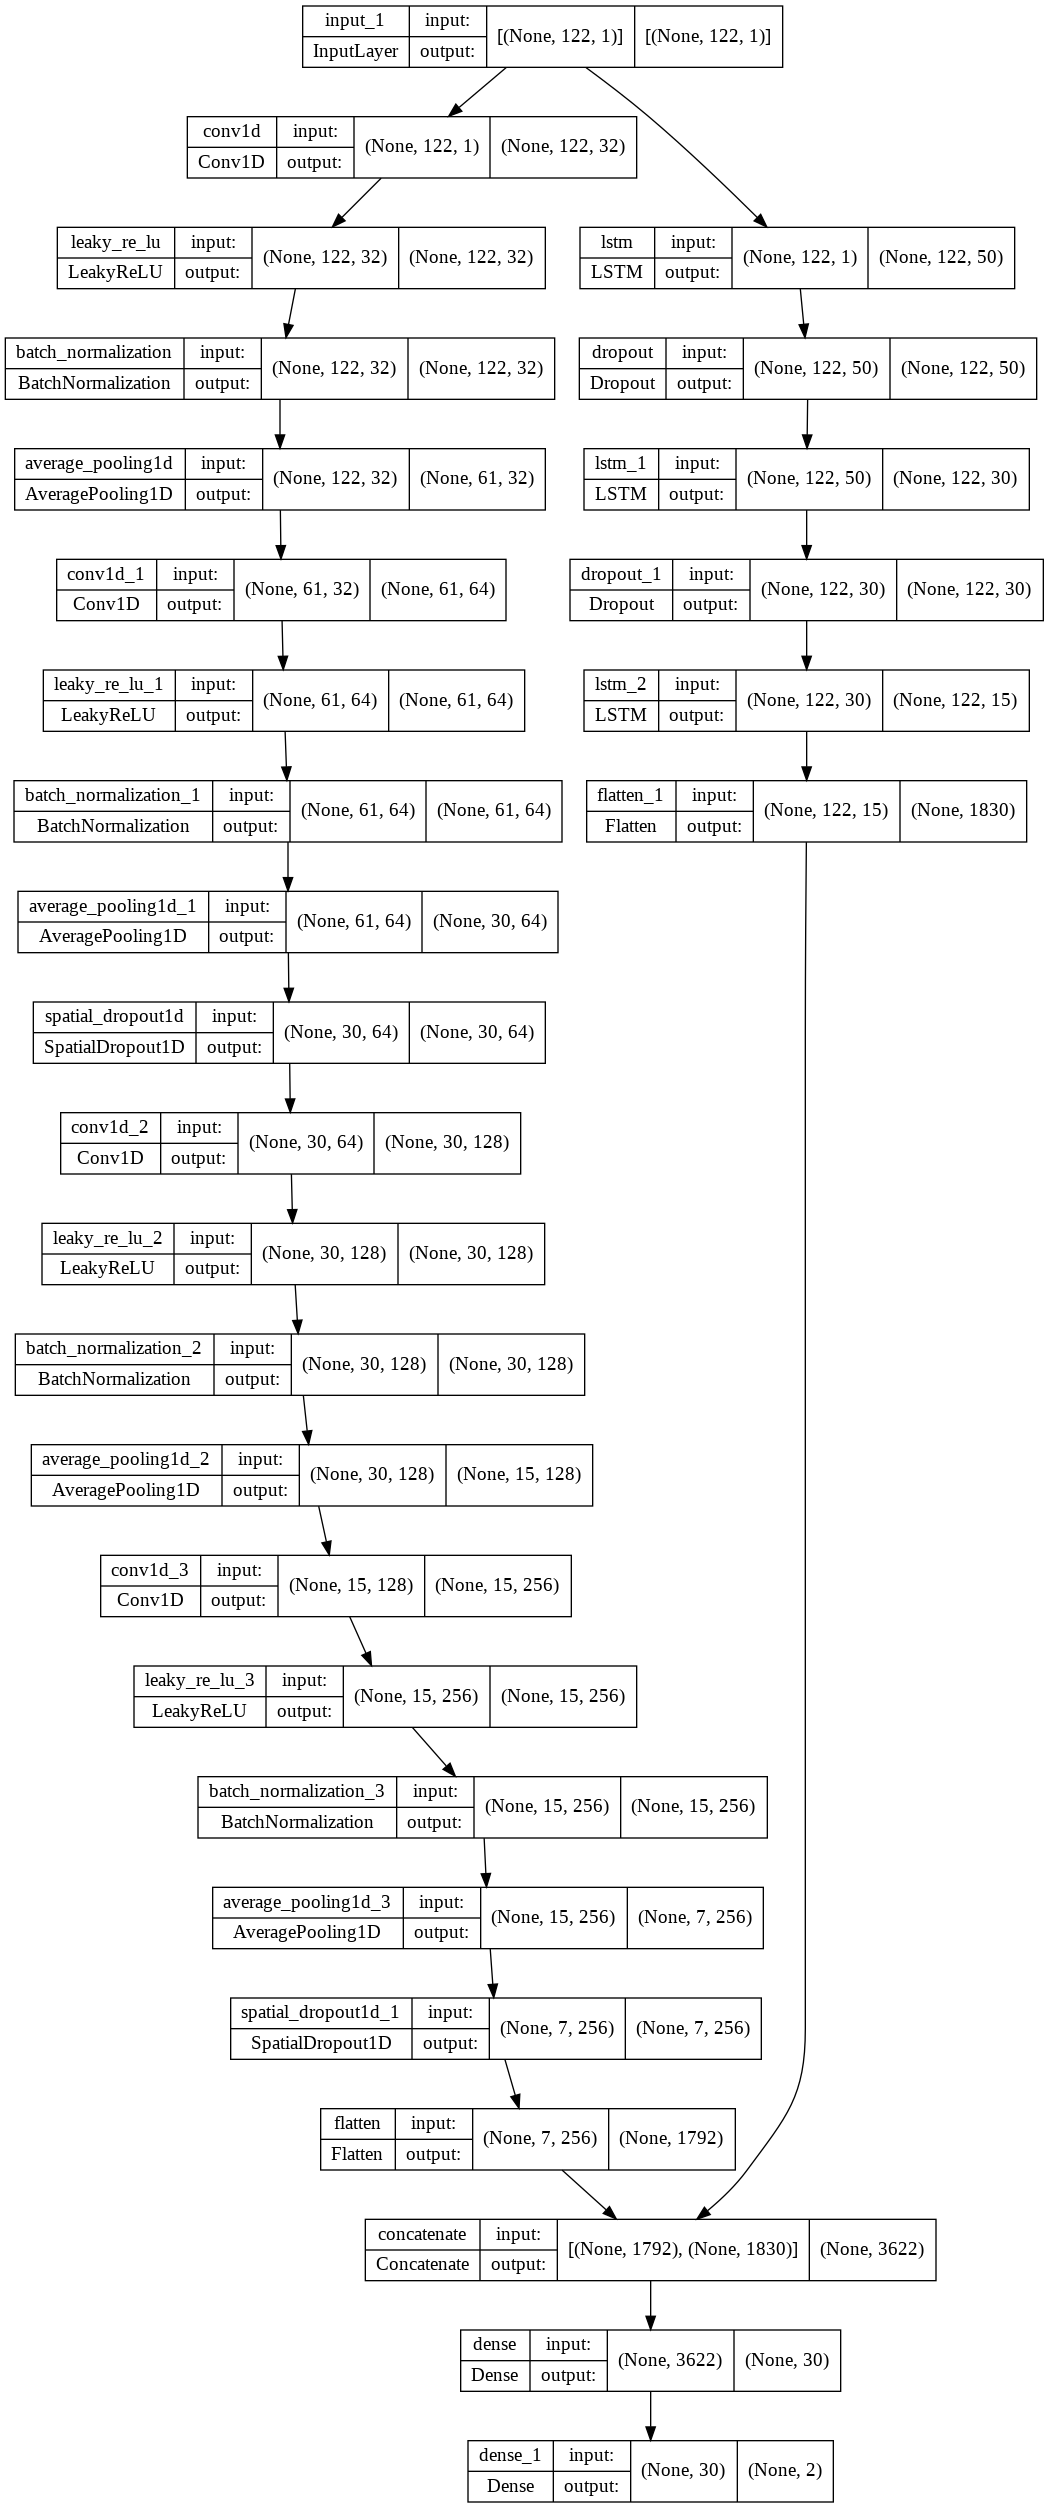

In [27]:
model = generate_model()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [28]:


from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy',keras.metrics.Precision()])

 

## **5.Fit the model**

**The loss function** is perhaps the most important
aspect of neural networks. The gradients are calculated
using the loss function, and the gradient is used to update
the neural network biases, increasing or decreasing the
neural network weights


In [ ]:
#model.fit(x_train, y_train, epochs = 100, batch_size =1000)
#model.fit(x_train, y_train, epochs =80,batch_size =128,validation_data=(x_valid, y_valid),callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1))
from keras.callbacks import EarlyStopping
#history = model.fit(x_train, y_train, epochs =80,batch_size =128,validation_data=(x_valid, y_valid),callbacks = [EarlyStopping(monitor='val_loss', patience=5)])
#history = model.fit(x_train, y_train, epochs =100,batch_size =500)
history = model.fit(x_train, y_train, epochs =100,batch_size =5000,validation_data=(x_valid, y_valid))


Epoch 1/100
26/26 [==============================] - 46s 1s/step - loss: 0.3717 - accuracy: 0.8296 - precision: 0.8272 - val_loss: 0.6950 - val_accuracy: 0.4308 - val_precision: 0.4308
Epoch 2/100
26/26 [==============================] - 36s 1s/step - loss: 0.2024 - accuracy: 0.9214 - precision: 0.9196 - val_loss: 0.7063 - val_accuracy: 0.4308 - val_precision: 0.4308
Epoch 3/100
26/26 [==============================] - 36s 1s/step - loss: 0.1660 - accuracy: 0.9393 - precision: 0.9365 - val_loss: 0.7197 - val_accuracy: 0.4308 - val_precision: 0.4308
Epoch 4/100
26/26 [==============================] - 36s 1s/step - loss: 0.1427 - accuracy: 0.9492 - precision: 0.9481 - val_loss: 0.7326 - val_accuracy: 0.4308 - val_precision: 0.4308
Epoch 5/100
26/26 [==============================] - 35s 1s/step - loss: 0.1264 - accuracy: 0.9561 - precision: 0.9547 - val_loss: 0.7374 - val_accuracy: 0.4308 - val_precision: 0.4308
Epoch 6/100
26/26 [==============================] - 36s 1s/step - loss: 0.

In [ ]:

pred = model.predict(x_test)
y_pred= np.argmax(pred, axis = 1)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

loss_val = history.history['val_loss']
acc_val = history.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, acc_val, 'g', label='train loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_val = history.history['val_accuracy']
acc_train = history.history['accuracy']
epochs = range(1,101)
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.plot(epochs, acc_train, 'g', label='train_accuracy')
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#check accuaracy of prediction
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score
#model.score(x_valid,y_valid)

In [ ]:
#cf_matrix=confusion_matrix(y_valid, y_pred)
y_test_arg=np.argmax(y_test,axis=1)
import time
from datetime import timedelta

start_time = time.time()
Y_pred = np.argmax(model.predict(x_test),axis=1) 
elapsed_time_secs = time.time() - start_time
msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))
print('Confusion Matrix')
cf_matrix=confusion_matrix(y_test_arg, Y_pred)
print(cf_matrix)

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, cmap='coolwarm',annot=True, linewidth=1,fmt="d")
plt.show()

In [ ]:
accuracy =accuracy_score(y_test_arg, Y_pred)*100
print(accuracy)

In [ ]:
recall = recall_score(y_test_arg, Y_pred , average="binary")
precision = precision_score(y_test_arg, Y_pred, average="binary")
FPR = cf_matrix[0][1]/(cf_matrix[0][1]+cf_matrix[1][1]) 


In [ ]:
print("Accuracy : ",accuracy)
print("Precision : " , precision*100)
print("Recall : ", recall*100)
print("FPR : ",FPR*100)
print("time: ",msg)